<a href="https://colab.research.google.com/github/duaneywadey/colab/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [ ]:
# importing our dataset
car_dataset = pd.read_csv('/content/drive/MyDrive/car data - car data.csv')

In [ ]:
# load the first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [ ]:
# get information about our dataset
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014         335000         559000       27000    Petrol   
1        sx4  2013         475000         954000       43000    Diesel   
2       ciaz  2017         725000         985000        6900    Petrol   
3    wagon r  2011         285000         415000        5200    Petrol   
4      swift  2014         460000         687000       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016         950000        1160000       33988    Diesel   
297     brio  2015         400000         590000       60000    Petrol   
298     city  2009         335000        1100000       87934    Petrol   
299     city  2017        1150000        1250000        9000    Diesel   
300     brio  2016         530000         590000        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [ ]:
# checking the number of missing values
car_dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Car_Name   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Seller_T

In [ ]:
# checking the distribution of categorical data (Check the following fuel, seller, and transmission)
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
# Replacing values from the Fuel_Type column 
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Replacing values from the Seller_Type column 
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)

# Replacing values from the Seller_Type column 
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)
 

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,0,0,0,0
1,sx4,2013,475000,954000,43000,1,0,0,0
2,ciaz,2017,725000,985000,6900,0,0,0,0
3,wagon r,2011,285000,415000,5200,0,0,0,0
4,swift,2014,460000,687000,42450,1,0,0,0


In [ ]:
# Drop the CarName and SellingPrice column, X - HAS THE PRESENT PRICE
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)

# Get the SellingPrice column, Y - HAS THE SELLING PRICE
Y = car_dataset['Selling_Price'] 

In [ ]:
print(X,Y)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014         559000       27000          0            0             0   
1    2013         954000       43000          1            0             0   
2    2017         985000        6900          0            0             0   
3    2011         415000        5200          0            0             0   
4    2014         687000       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016        1160000       33988          1            0             0   
297  2015         590000       60000          0            0             0   
298  2009        1100000       87934          0            0             0   
299  2017        1250000        9000          1            0             0   
300  2016         590000        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
# Split our training and test data, random_state - to split the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [ ]:
# Let's now train our model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Evaluate our model, predicts the price values depending on other data given
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8799451660493711


Text(0.5, 1.0, 'Actual Prices')

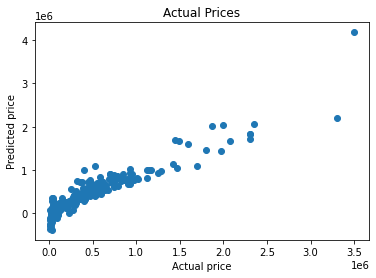

In [ ]:
# Visualize the actual prices and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices")

In [ ]:
# Evaluate our model, predicts the price values depending on other data given
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8365766715025028


Text(0.5, 1.0, 'Actual Prices')

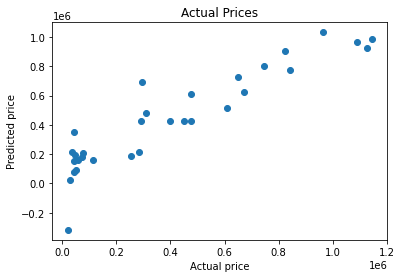

In [ ]:
 # Visualize the actual prices and predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices")


In [ ]:
print(test_data_prediction)

[1032892.85467276   77165.6731212   426482.32354201  478985.00219959
  988701.56848547  424823.19322821  692536.95348084  729321.06471658
   21950.51432516  518527.58202678  623823.96383244  607761.01898243
  217169.32011187  777611.97293106  189987.9578086   179635.89483817
  210001.12263107  191953.21145441  924977.00553229  425291.48562272
  156991.1997548   904949.04868741  152561.15689375  965418.58717488
   89631.31471717  799187.62593146  159929.50456932 -317680.91196556
  424653.98829997  212570.15022756  349654.93501638]


In [ ]:
input_data = (1988,5000000,200000,0,1,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lin_reg_model.predict(input_data_reshaped)
for x in prediction:
  print("Selling Price: ", int(x), "pesos")


Selling Price:  1050924 pesos


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,0,0,0,0
1,sx4,2013,475000,954000,43000,1,0,0,0
2,ciaz,2017,725000,985000,6900,0,0,0,0
3,wagon r,2011,285000,415000,5200,0,0,0,0
4,swift,2014,460000,687000,42450,1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


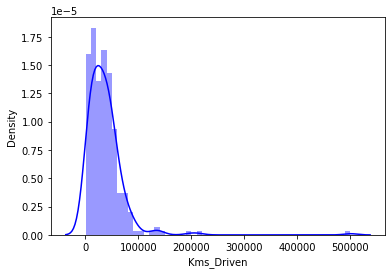

In [ ]:
sns.distplot(car_dataset['Kms_Driven'], color='blue')